In [5]:
import os
import sys

# Boiler plate code to ensure scripts can import code from waves package.
# Adds project directory to python path.
proj_dir = os.path.dirname(os.path.abspath(os.curdir))
if sys.path[0] != proj_dir:
    sys.path.insert(0, proj_dir)
print(f"Project directory: {proj_dir}") 

from waves.misc import flatten
from waves.load_data import load_json_file_from_path
from waves.misc import dict_to_list

Project directory: C:\Users\tul72\Box\aeml


## Load Data

In [7]:
path = r'C:\Users\tul72\Box\aeml\experiment_data\robustness\filtered\20220711_01.json'
data = load_json_file_from_path(path)

# Signal Processing Parameters
sig_len = 4096
dt = 10**-7
duration = sig_len*dt*10**6 # convert to us
time = np.linspace(0,duration,sig_len) # discretization of signal time

In [12]:
data['distance']

array(['0dist', '0dist', '0dist', ..., '0dist', '0dist', '0dist'],
      dtype='<U5')

## Separate out waveforms and metadata according to plate length

In [77]:
from plotting import create_figure, plot_signal
import matplotlib.pyplot as plt
import numpy as np

waves = data['waves']
location = data['location']
angle = data['angle']
length = data['length']
event = data['event']
sensor = data['sensor']

def load_scenario(waves,event,location,angle,length,sensor,leng,num_sen,loc,ang):
    
    if num_sen == 4:
        w = [waves[(length == leng) & (sensor == 1) & (location == loc) & (angle == ang)],
             waves[(length == leng) & (sensor == 2) & (location == loc) & (angle == ang)],
             waves[(length == leng) & (sensor == 3) & (location == loc) & (angle == ang)],
             waves[(length == leng) & (sensor == 4) & (location == loc) & (angle == ang)]]
    elif num_sen == 2:
        w = [waves[(length == leng) & (sensor == 1) & (location == loc) & (angle == ang)],
             waves[(length == leng) & (sensor == 2) & (location == loc) & (angle == ang)]]
    elif num_sen == 1:
        w = waves[(length == leng) & (sensor == 1) & (location == loc) & (angle == ang)]
              
    ev = event[(length==leng) & (sensor==1) & (location==loc) & (angle == ang)]
    
    print(f"# of {leng}, {ang}, {loc}, {num_sen} channel waves : {len(ev)}")

    return w,ev

def compute_mean_wave(w):
    
    # Check if multiple channel
    if type(w) == list: 
        mean_w = []
        for idx, channel in enumerate(w):
            mean_w.append(np.mean(channel,axis=0))
    else: # single channel
        mean_w = np.mean(w,axis=0)
        
    return mean_w

# 6 inch 70 deg front
w6in_front_70deg, ev6in_front_70deg = load_scenario(waves,event,location,angle,length,sensor,'6in',4,'front','70deg')
mean_w6in_front_70deg = compute_mean_wave(w6in_front_70deg)

# 6 inch 80 deg front
w6in_front_80deg, ev6in_front_80deg = load_scenario(waves,event,location,angle,length,sensor,'6in',4,'front','80deg')
mean_w6in_front_80deg = compute_mean_wave(w6in_front_80deg)

# 6 inch 70 deg backcorner
w6in_back_70deg, ev6in_back_70deg = load_scenario(waves,event,location,angle,length,sensor,'6in',4,'backcorner','70deg')
mean_w6in_back_70deg = compute_mean_wave(w6in_back_70deg)

# 6 inch 80 deg backcorner
w6in_back_80deg, ev6in_back_80deg = load_scenario(waves,event,location,angle,length,sensor,'6in',4,'backcorner','80deg')
mean_w6in_back_80deg = compute_mean_wave(w6in_back_80deg)

# 6 inch 70 deg topedge
w6in_tope_70deg, ev6in_tope_70deg = load_scenario(waves,event,location,angle,length,sensor,'6in',4,'tope','70deg')
mean_w6in_tope_70deg = compute_mean_wave(w6in_tope_70deg)

# 6 inch 60 deg topedge
w6in_tope_60deg, ev6in_tope_60deg = load_scenario(waves,event,location,angle,length,sensor,'6in',4,'tope','60deg')
mean_w6in_tope_60deg = compute_mean_wave(w6in_tope_60deg)

# of 6in, 70deg, front, 4 channel waves : 45
# of 6in, 80deg, front, 4 channel waves : 50
# of 6in, 70deg, backcorner, 4 channel waves : 50
# of 6in, 80deg, backcorner, 4 channel waves : 44
# of 6in, 70deg, tope, 4 channel waves : 44
# of 6in, 60deg, tope, 4 channel waves : 50
283


283.0

## Plot the waves from each plate length, and ensure no signals need to be filtered
Signals should have already been filtered at this stage. This is just to double check.

## Compute and Plot the Mean Waveforms for each Plate Length

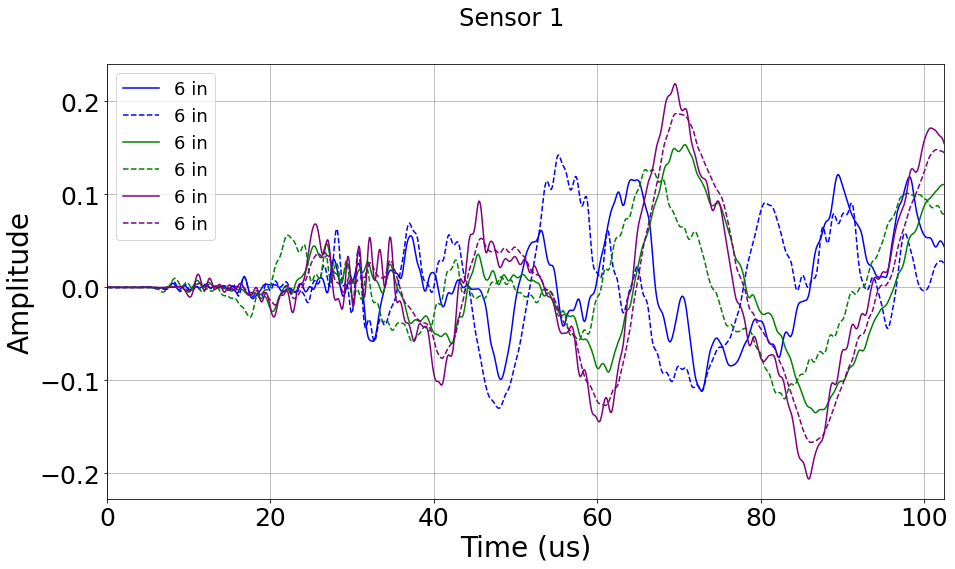

In [90]:
# Plot the averaged waveforms
fig,spec2 = create_figure('Sensor 1',columns=1,rows=1,width=15,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)

ax = fig.add_subplot(spec2[0,0])
ax.plot(time,mean_w6in_front_70deg[3],'-',label = '6 in', color='blue')
ax.plot(time,mean_w6in_front_80deg[3],'--',label = '6 in', color='blue')
ax.plot(time,mean_w6in_tope_70deg[3],'-',label = '6 in', color='green')
ax.plot(time,mean_w6in_tope_60deg[3],'--',label = '6 in', color='green')
ax.plot(time,mean_w6in_back_70deg[3],'-',label = '6 in', color='purple')
ax.plot(time,mean_w6in_back_80deg[3],'--',label = '6 in', color='purple')

plt.legend()
ax.set_xlim([0,duration/4])
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
#ax.set_ylim([-0.9,0.65])

plt.grid()
plt.show()

### Sensor 1

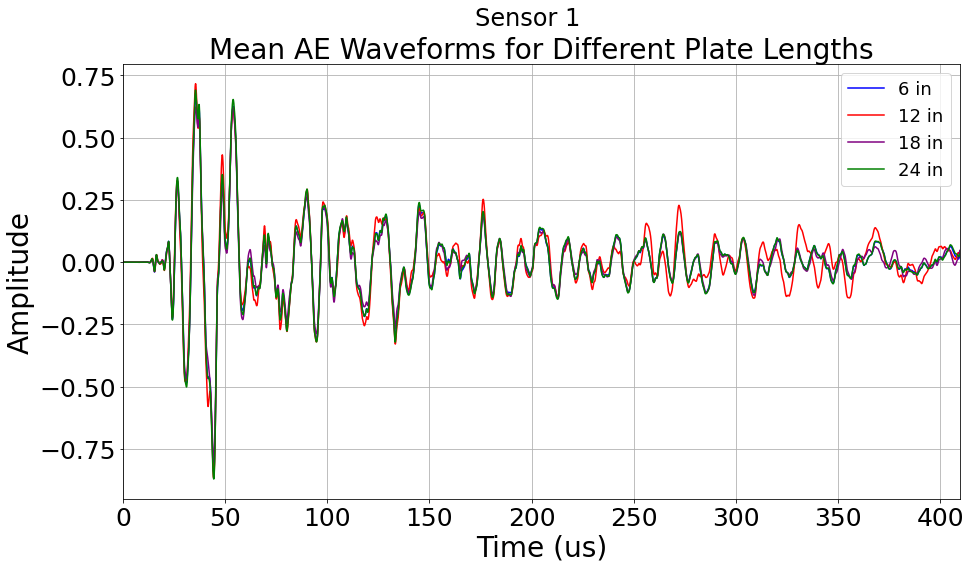

In [75]:
# Plot the averaged waveforms
fig,spec2 = create_figure('Sensor 1',columns=1,rows=1,width=15,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)

ax = fig.add_subplot(spec2[0,0])
ax.plot(time,mean_w6in[0],'-',label = '6 in', color='blue')
ax.plot(time,mean_w12in[0],'-',label = '12 in', color='red')
ax.plot(time,mean_w18in[0],'-',label = '18 in', color='purple')
ax.plot(time,mean_w24in[0],'-',label = '24 in', color='green')

ax.set_title('Mean AE Waveforms for Different Plate Lengths')

plt.legend()
ax.set_xlim([0,duration])
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
#ax.set_ylim([-0.9,0.65])

plt.grid()
plt.show()

### Sensor 2

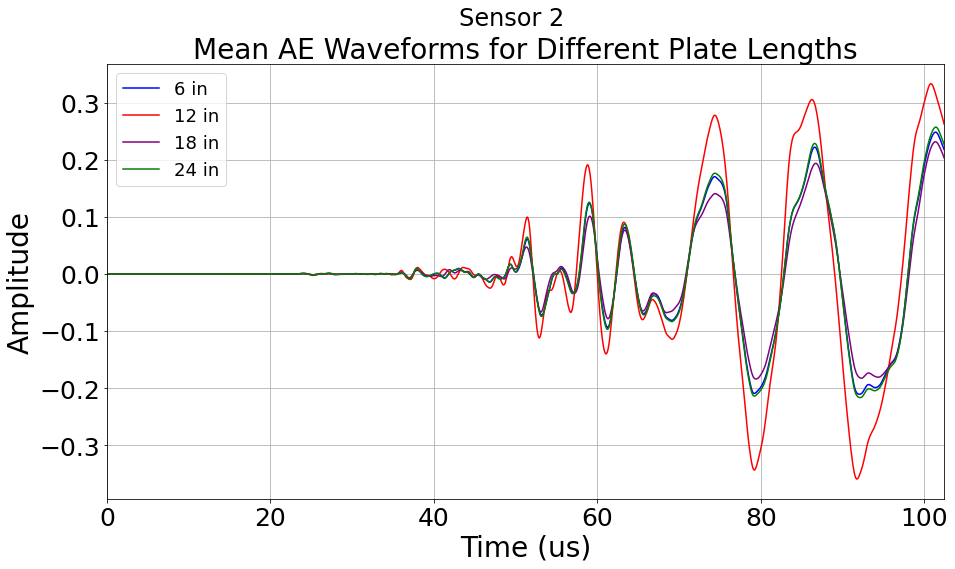

In [76]:
# Plot the averaged waveforms
fig,spec2 = create_figure('Sensor 2',columns=1,rows=1,width=15,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)

ax = fig.add_subplot(spec2[0,0])
ax.plot(time,mean_w6in[1],'-',label = '6 in', color='blue')
ax.plot(time,mean_w12in[1],'-',label = '12 in', color='red')
ax.plot(time,mean_w18in[1],'-',label = '18 in', color='purple')
ax.plot(time,mean_w24in[1],'-',label = '24 in', color='green')

ax.set_title('Mean AE Waveforms for Different Plate Lengths')

plt.legend()
ax.set_xlim([0,duration/4])
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
#ax.set_ylim([-0.9,0.65])

plt.grid()
plt.show()

### Sensor 3

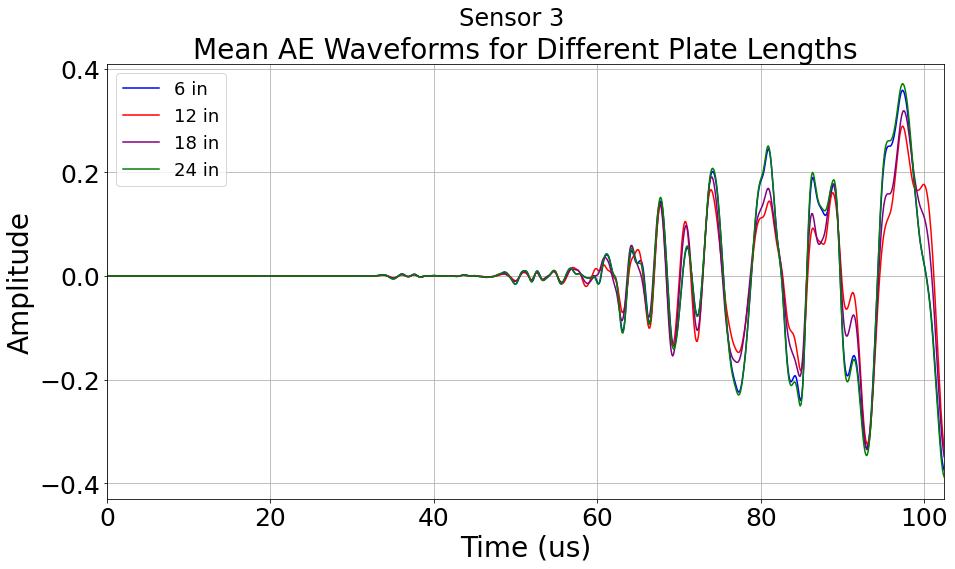

In [77]:
# Plot the averaged waveforms
fig,spec2 = create_figure('Sensor 3',columns=1,rows=1,width=15,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)

ax = fig.add_subplot(spec2[0,0])
ax.plot(time,mean_w6in[2],'-',label = '6 in', color='blue')
ax.plot(time,mean_w12in[2],'-',label = '12 in', color='red')
ax.plot(time,mean_w18in[2],'-',label = '18 in', color='purple')
ax.plot(time,mean_w24in[2],'-',label = '24 in', color='green')

ax.set_title('Mean AE Waveforms for Different Plate Lengths')

plt.legend()
ax.set_xlim([0,duration/4])
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
#ax.set_ylim([-0.9,0.65])

plt.grid()
plt.show()

### Sensor 4

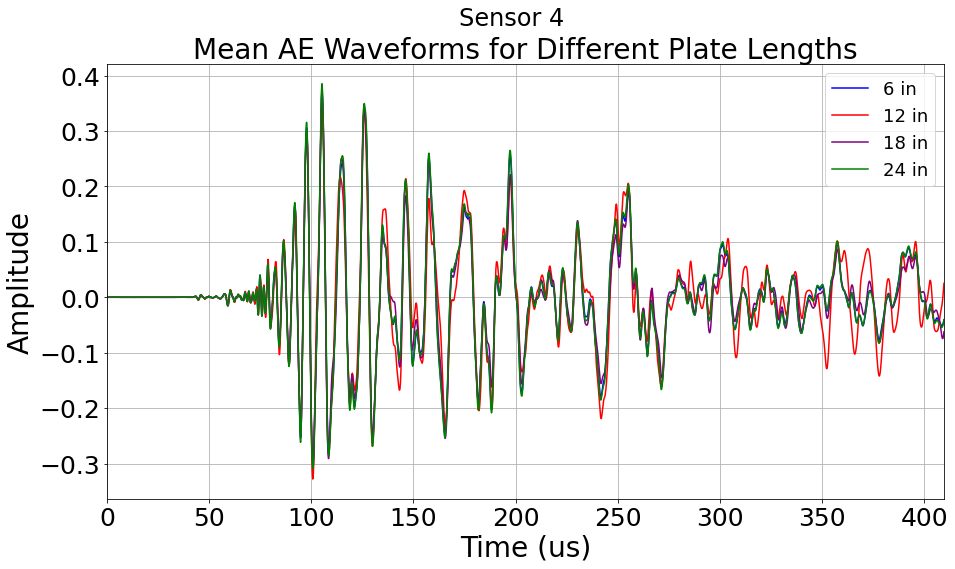

In [78]:
# Plot the averaged waveforms
fig,spec2 = create_figure('Sensor 4',columns=1,rows=1,width=15,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)

ax = fig.add_subplot(spec2[0,0])
ax.plot(time,mean_w6in[3],'-',label = '6 in', color='blue')
ax.plot(time,mean_w12in[3],'-',label = '12 in', color='red')
ax.plot(time,mean_w18in[3],'-',label = '18 in', color='purple')
ax.plot(time,mean_w24in[3],'-',label = '24 in', color='green')

ax.set_title('Mean AE Waveforms for Different Plate Lengths')

plt.legend()
ax.set_xlim([0,duration])
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
#ax.set_ylim([-0.9,0.65])

plt.grid()
plt.show()

## Compute and Plot Mean FFT (Entire Waveform)
The FFTs here are computed on the entire raw waveform (this is necessary to average them all and visualize, otherwise the ffts would have different lengths). Later in the code, the waveforms are chopped down to only what's contained between the start and end (what's visualized in the previous plotting of raw waveforms) before computed frequency domain features. 

In [79]:
# Compute FFTs
low_pass = 0             # [Hz] ; low frequency cutoff
high_pass = 1000*10**3    # [Hz] ; high frequency cutoff\
dt = 10**-7              # [seconds] ; sample period / time between samples
fft_units = 1000

from ae_measure2 import fft

In [80]:
# 6 in
fft6in = []
for sensor in w6in: 
    fftsensor = []
    for idx,wave in enumerate(sensor):
        w,z = fft(dt, wave, low_pass, high_pass)
        fftsensor.append(z/max(z))
    fft6in.append(np.array(fftsensor))
mean_fft6in = [np.mean(fft6in[0], axis=0), np.mean(fft6in[1], axis=0),  
             np.mean(fft6in[2], axis=0), np.mean(fft6in[3], axis=0)]  

In [81]:
# 12 in
fft12in = []
for sensor in w12in: 
    fftsensor = []
    for idx,wave in enumerate(sensor):
        w,z = fft(dt, wave, low_pass, high_pass)
        fftsensor.append(z/max(z))
    fft12in.append(np.array(fftsensor))
mean_fft12in = [np.mean(fft12in[0], axis=0), np.mean(fft12in[1], axis=0),  
             np.mean(fft12in[2], axis=0), np.mean(fft12in[3], axis=0)]  

In [82]:
# 18 in
fft18in = []
for sensor in w18in: 
    fftsensor = []
    for idx,wave in enumerate(sensor):
        w,z = fft(dt, wave, low_pass, high_pass)
        fftsensor.append(z/max(z))
    fft18in.append(np.array(fftsensor))
mean_fft18in = [np.mean(fft18in[0], axis=0), np.mean(fft18in[1], axis=0),  
             np.mean(fft18in[2], axis=0), np.mean(fft18in[3], axis=0)]  

In [83]:
# 24 in
fft24in = []
for sensor in w24in: 
    fftsensor = []
    for idx,wave in enumerate(sensor):
        w,z = fft(dt, wave, low_pass, high_pass)
        fftsensor.append(z/max(z))
    fft24in.append(np.array(fftsensor))
mean_fft24in = [np.mean(fft24in[0], axis=0), np.mean(fft24in[1], axis=0),  
             np.mean(fft24in[2], axis=0), np.mean(fft24in[3], axis=0)]  

w = w/fft_units; # khz

### Sensor 1

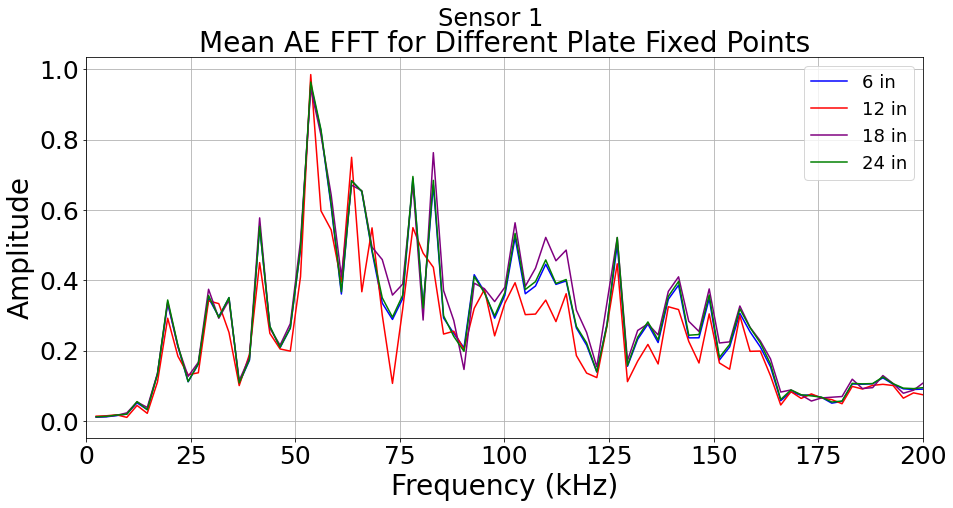

In [84]:
# Plot the averaged ffts
fig,spec2 = create_figure('Sensor 1',columns=1,rows=1,width=15,height=7,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
ax = fig.add_subplot(spec2[0,0])
ax.plot(w,mean_fft6in[0],'-',label = '6 in', color='blue')
ax.plot(w,mean_fft12in[0],'-',label = '12 in', color='red')
ax.plot(w,mean_fft18in[0],'-',label = '18 in', color='purple')
ax.plot(w,mean_fft24in[0],'-',label = '24 in', color='green')

ax.set_title('Mean AE FFT for Different Plate Fixed Points')

ax.set_xlim([low_pass/fft_units,high_pass/fft_units])
ax.set_xlim([0,200])
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude')
plt.legend()

plt.grid()
plt.show()

### Sensor 2

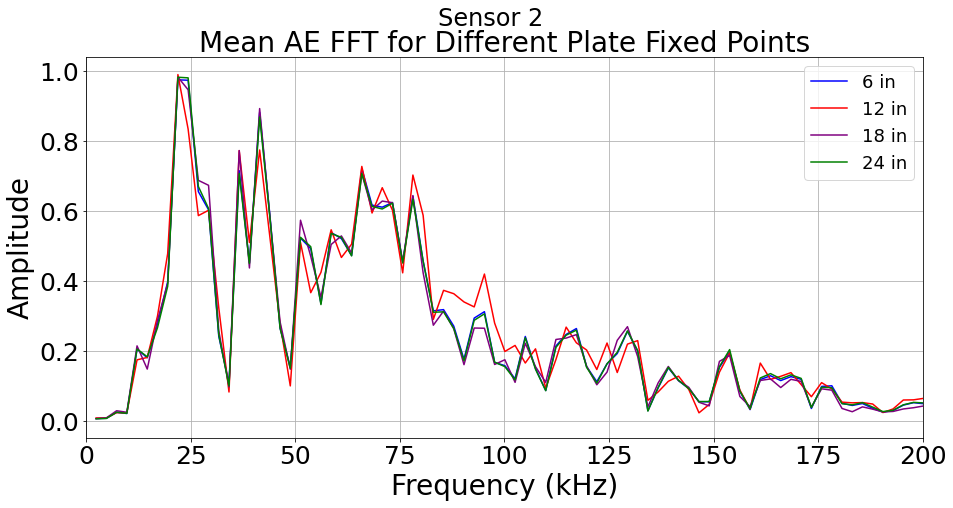

In [85]:
# Plot the averaged ffts
fig,spec2 = create_figure('Sensor 2',columns=1,rows=1,width=15,height=7,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
ax = fig.add_subplot(spec2[0,0])
ax.plot(w,mean_fft6in[1],'-',label = '6 in', color='blue')
ax.plot(w,mean_fft12in[1],'-',label = '12 in', color='red')
ax.plot(w,mean_fft18in[1],'-',label = '18 in', color='purple')
ax.plot(w,mean_fft24in[1],'-',label = '24 in', color='green')

ax.set_title('Mean AE FFT for Different Plate Fixed Points')

ax.set_xlim([low_pass/fft_units,high_pass/fft_units])
ax.set_xlim([0,200])
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude')
plt.legend()

plt.grid()
plt.show()

### Sensor 3

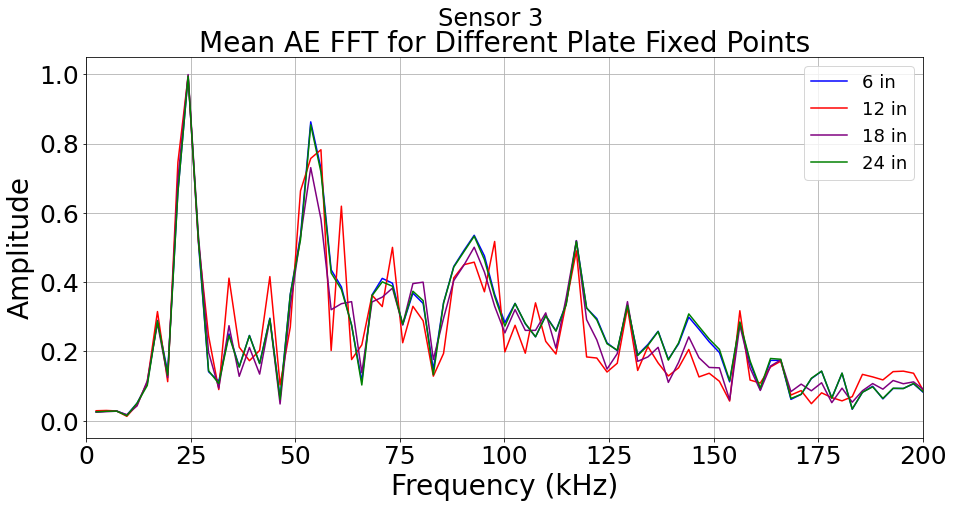

In [86]:
# Plot the averaged ffts
fig,spec2 = create_figure('Sensor 3',columns=1,rows=1,width=15,height=7,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
ax = fig.add_subplot(spec2[0,0])
ax.plot(w,mean_fft6in[2],'-',label = '6 in', color='blue')
ax.plot(w,mean_fft12in[2],'-',label = '12 in', color='red')
ax.plot(w,mean_fft18in[2],'-',label = '18 in', color='purple')
ax.plot(w,mean_fft24in[2],'-',label = '24 in', color='green')

ax.set_title('Mean AE FFT for Different Plate Fixed Points')

ax.set_xlim([low_pass/fft_units,high_pass/fft_units])
ax.set_xlim([0,200])
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude')
plt.legend()

plt.grid()
plt.show()

### Sensor 4

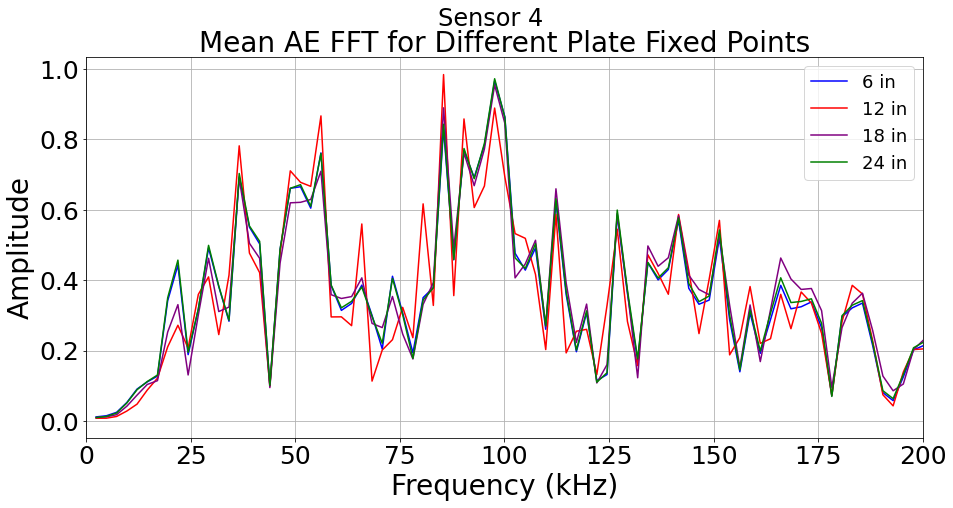

In [87]:
# Plot the averaged ffts
fig,spec2 = create_figure('Sensor 4',columns=1,rows=1,width=15,height=7,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
ax = fig.add_subplot(spec2[0,0])
ax.plot(w,mean_fft6in[3],'-',label = '6 in', color='blue')
ax.plot(w,mean_fft12in[3],'-',label = '12 in', color='red')
ax.plot(w,mean_fft18in[3],'-',label = '18 in', color='purple')
ax.plot(w,mean_fft24in[3],'-',label = '24 in', color='green')

ax.set_title('Mean AE FFT for Different Plate Fixed Points')

ax.set_xlim([low_pass/fft_units,high_pass/fft_units])
ax.set_xlim([0,200])
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude')
plt.legend()

plt.grid()
plt.show()